# World Data Visualization Prize

Team submission for the World Data Visualization Prize competition put on by the World Government Summit

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import seaborn as sns
import matplotlib.colors as color

### Initial exploration

In [3]:
ten_year_df = pd.read_csv('./data/World Dataviz Prize 2023 - What Just Happened_pivot.csv')

In [4]:
# compute percent of NA values
ten_year_df['value'].isna().sum()/len(ten_year_df['value']) # 16% NA

0.16251354279523295

In [5]:
ten_year_df.head(3)

,topic,data,year,value,metric,ten_year_change
0,Tropical Diseases,global deaths,2009,2051672.0,NaN,NaN
1,Tropical Diseases,global deaths,2010,2016434.0,NaN,NaN
2,Tropical Diseases,global deaths,2011,1960756.0,NaN,NaN


In [6]:
# merge topic and data for plotting
ten_year_df_merged = ten_year_df.copy()
ten_year_df_merged['topic'] = ten_year_df_merged['topic'] + '_' + ten_year_df_merged['data']
ten_year_df_merged = ten_year_df_merged.drop('data', axis=1)

KeyError: 'y'

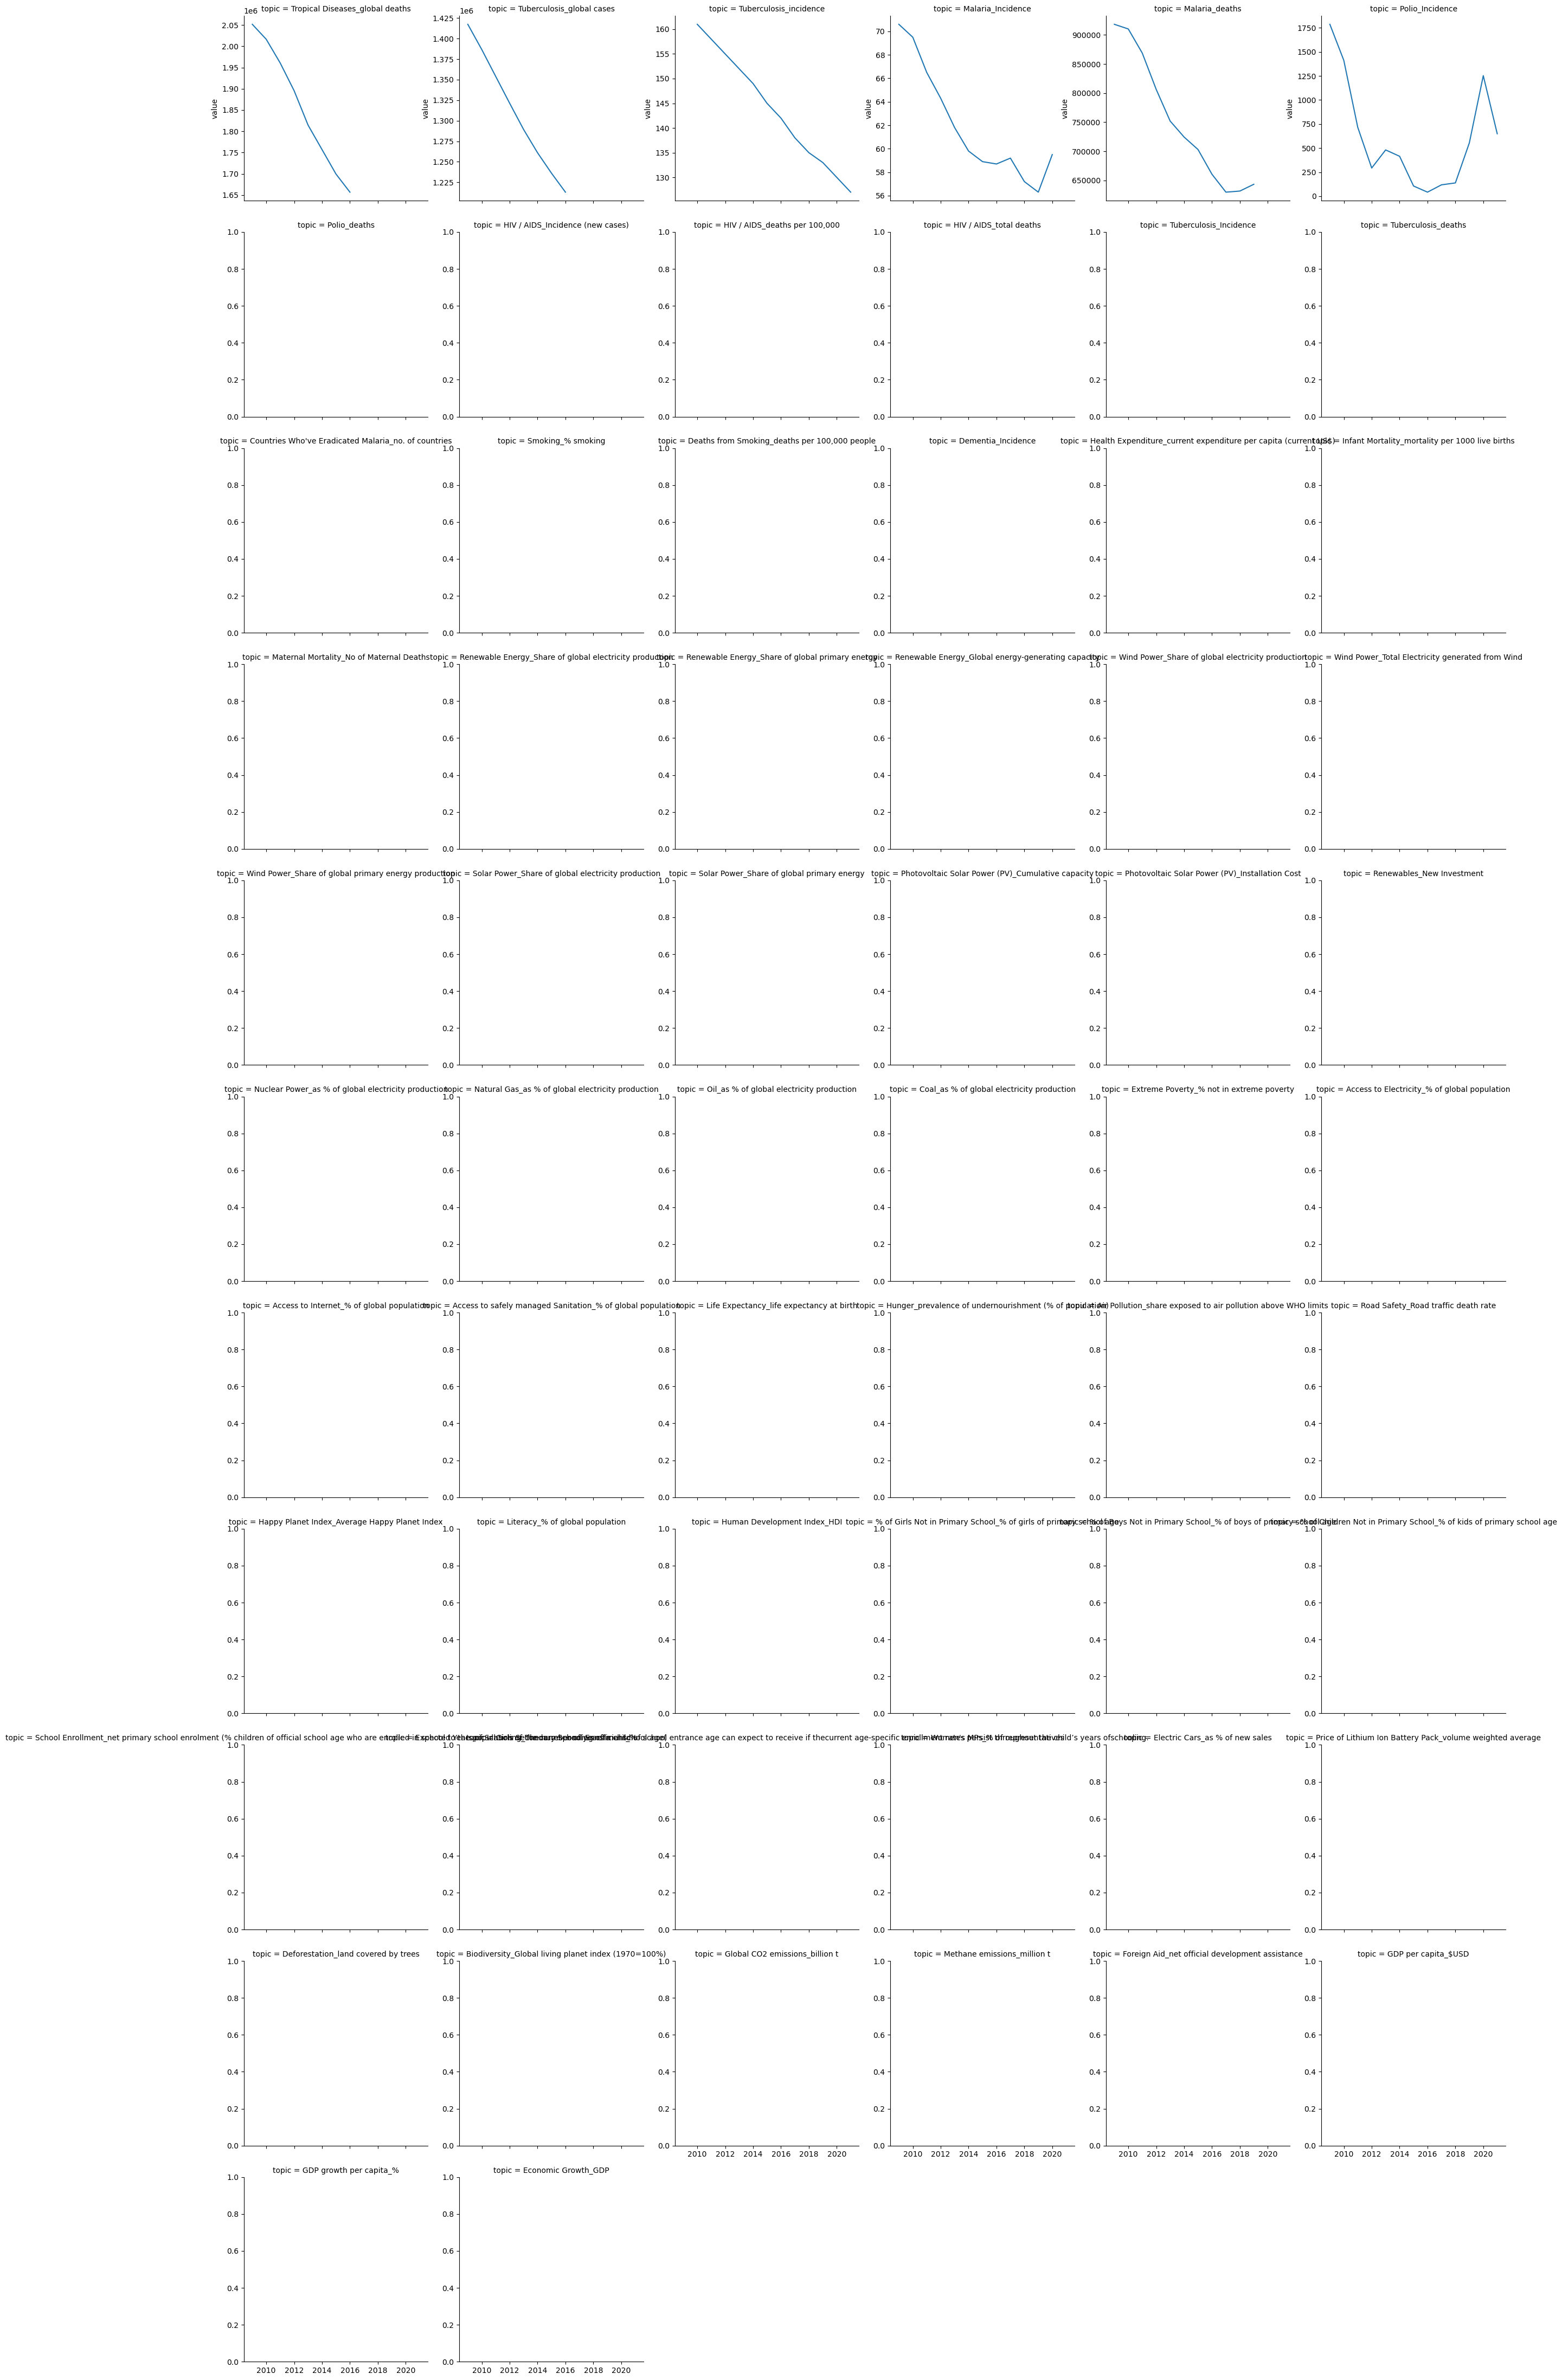

In [7]:
# good reference here: https://seaborn.pydata.org/tutorial/axis_grids.html

g = sns.FacetGrid(ten_year_df_merged, col='topic', sharey=False, col_wrap=6, height=4)
g.map(sns.lineplot, 'year', 'value')
g.set_titles(col_template = '{col_name}')

In [ ]:
# another way to do that ^
sns.relplot(data=ten_year_df, x='year', y='value', col='topic', kind='line')

### Energy Mix

In [8]:
energy_full = pd.read_csv('./data/WhatJustHappened_Energy_20230115.csv').rename(columns={'Unnamed: 0': 'year'})
energy = energy_full.set_index(energy_full['year'])
energy = energy[((energy.index <= 2020) & (energy.index >= 2010))].drop('year', axis=1)

energy.head(3)

,renew_share,renew_pri,renew_cap,wind_share,wind_prod,wind_pri,solar_share,solar_pri,solar_pc_cap,solar_pc_install,renew_invest,nuclear_share,gas_share,oil_share,coal_share
year,,,,,,,,,,,,,,,
2010,19.4,8.81,102.0,1.61,346,0.68,0.16,0.07,"40,338",4808.0,271.0,12.8,22.7,4.4,40.0
2011,19.8,8.99,110.0,1.98,440,0.84,0.29,0.13,"72,216",4104.0,323.0,11.9,22.2,4.7,40.8
2012,20.6,9.42,118.0,2.32,530,0.99,0.45,0.19,"101,745",3124.0,290.0,10.8,23.0,5.0,39.9


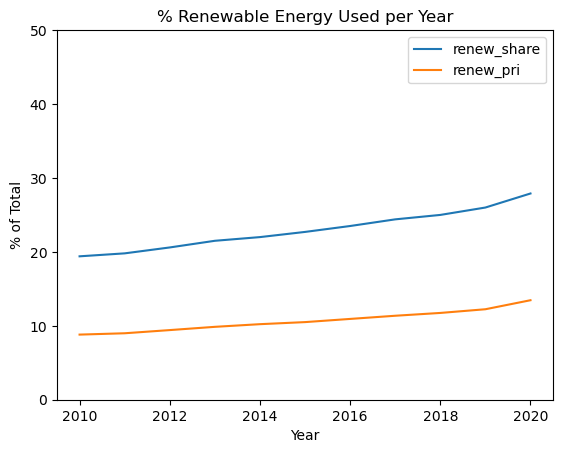

In [9]:
plt.plot(energy['renew_share'])
plt.plot(energy['renew_pri'])
plt.title('% Renewable Energy Used per Year')
plt.xlabel('Year')
plt.ylabel('% of Total')
plt.ylim((0, 50))

plt.legend(['renew_share', 'renew_pri'])
plt.show()

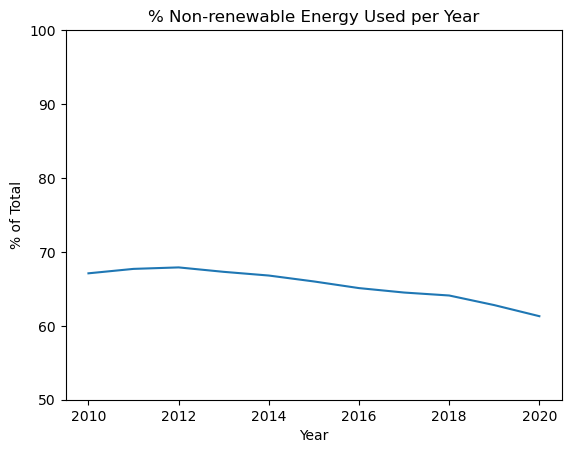

In [10]:
energy['nonrenew_share'] = energy['gas_share'] + energy['oil_share'] + energy['coal_share']
plt.plot(energy['nonrenew_share'])
plt.title('% Non-renewable Energy Used per Year')
plt.xlabel('Year')
plt.ylabel('% of Total')
plt.ylim((50, 100))
plt.show()

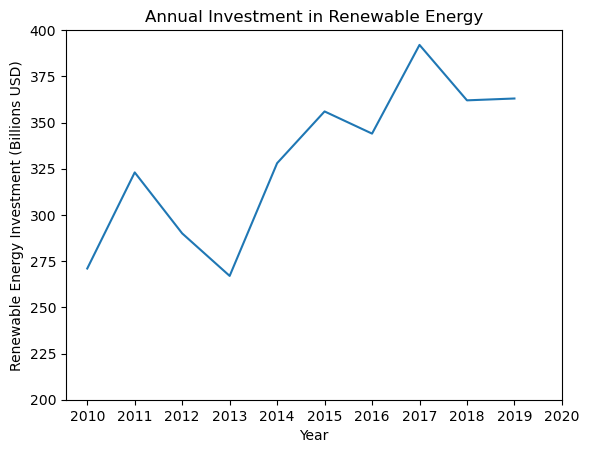

In [11]:
plt.plot(energy['renew_invest'])
plt.title('Annual Investment in Renewable Energy')
plt.ylabel('Renewable Energy Investment (Billions USD)')
plt.xlabel('Year')
plt.xticks([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])
plt.ylim((200, 400))
plt.show()

### Plotting Countries

In [12]:
expend = pd.read_csv('data/Environmental_Protection_Expenditures.csv')
expend.head(3)

,ObjectId,Country,ISO2,ISO3,Indicator,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,Unit,...,F2012,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,Expenditure on biodiversity & landscape protec...,"International Monetary Fund (IMF), Statistics ...",GENB_G14,Expenditure on Biodiversity & Landscape Protec...,"Government and Public Sector Finance, Expendit...",Domestic Currency,...,NaN,NaN,NaN,NaN,1.243785e+08,1.258269e+09,NaN,NaN,NaN,NaN
1,2,"Afghanistan, Islamic Rep. of",AF,AFG,Expenditure on biodiversity & landscape protec...,"International Monetary Fund (IMF), Statistics ...",GENB_G14,Expenditure on Biodiversity & Landscape Protec...,"Government and Public Sector Finance, Expendit...",Percent of GDP,...,NaN,NaN,NaN,NaN,9.433491e-03,9.134202e-02,NaN,NaN,NaN,NaN
2,3,"Afghanistan, Islamic Rep. of",AF,AFG,Expenditure on environment protection,"International Monetary Fund (IMF), Statistics ...",GEN_G14,Environmental Protection Expenditures,"Government and Public Sector Finance, Expendit...",Domestic Currency,...,2.846995e+09,3.344665e+09,2.204964e+09,1.122601e+09,1.702933e+09,2.377937e+09,NaN,NaN,NaN,NaN


In [13]:
expend = expend[expend['Unit'] == 'Percent of GDP'].fillna(int(0))

In [14]:
expend = expend[['Country', 'ISO3', 'F2010', 'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018', 'F2019', 'F2020']]
expend = expend.groupby(['Country']).agg('sum')
explore = expend.groupby(['Country']).agg('sum')

C:\Users\johnb\AppData\Local\Temp\ipykernel_9336\1609200304.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  expend = expend.groupby(['Country']).agg('sum')


In [15]:
rel = ['China', 'United States', 'Germany', 'Japan', 'Russia', 'Saudi Arabia', 'United Arab Emirates', 'United Kingdom', 'India', 'Italy', 'Spain', 'France', 'Netherlands, The', 'Canada', 'Belgium', 'Mexico', 'Denmark', 'Chile', 'Indonesia']
explore = explore.loc[explore.index.isin(rel)]

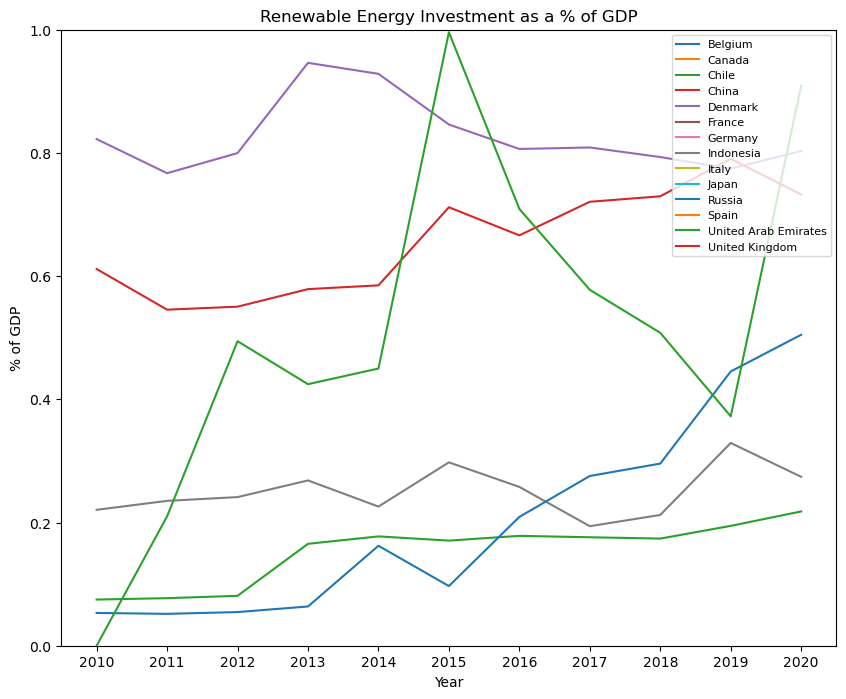

In [16]:
fig, ax = plt.subplots(1, figsize=(10, 8))
plt.plot(explore.T)
plt.legend(explore.T.columns, loc='upper right', fontsize=8)
plt.title('Renewable Energy Investment as a % of GDP')
plt.xlabel('Year')
plt.xticks(['F2010', 'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018', 'F2019', 'F2020'], [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])
plt.ylabel('% of GDP')
plt.ylim((0, 1))
plt.show()

In [17]:
renew_invest_avg = explore
renew_invest_avg['renew_invest_avg'] = (renew_invest_avg['F2010'] + renew_invest_avg['F2011'] + renew_invest_avg['F2012'] + renew_invest_avg['F2013'] + renew_invest_avg['F2014'] + renew_invest_avg['F2015'] + renew_invest_avg['F2016'] + renew_invest_avg['F2017'] + renew_invest_avg['F2018'] + renew_invest_avg['F2019'] + renew_invest_avg['F2020']) / 11
renew_invest_avg = renew_invest_avg.drop(['F2010', 'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018', 'F2019', 'F2020'], axis=1)
renew_invest_avg

,renew_invest_avg
Country,
Belgium,2.726771
Canada,1.363102
Chile,0.153419
China,0.656603
Denmark,0.826918
France,1.986604
Germany,1.161476
Indonesia,0.250591
Italy,1.777062


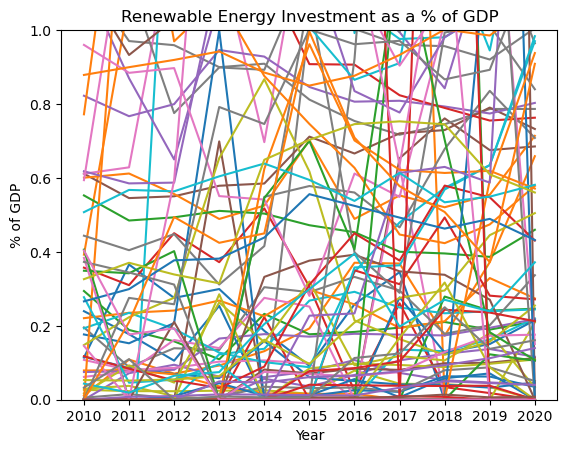

In [18]:
plt.plot(expend.T)
# plt.legend(expend.T.columns)
plt.title('Renewable Energy Investment as a % of GDP')
plt.xlabel('Year')
plt.xticks(['F2010', 'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018', 'F2019', 'F2020'], [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])
plt.ylabel('% of GDP')
plt.ylim((0, 1))
plt.show()

### Primary Energy Share

In [19]:
primary = pd.read_csv('./data/renewable-share-energy-clean.csv').set_index('Entity')

In [20]:
rel = ['China', 'United States', 'Germany', 'Japan', 'Russia', 'Saudi Arabia', 'United Arab Emirates', 'United Kingdom', 'India', 'Italy', 'Spain', 'France', 'Netherlands, The', 'Canada', 'Belgium', 'Mexico', 'Denmark', 'Chile', 'Indonesia']
primary = primary.loc[primary.index.isin(rel)]
primary = primary[['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']]
primary

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Entity,,,,,,,,,,,
Belgium,3.099551,4.045991,5.060075,5.382620,6.051173,6.661416,6.357454,6.910616,7.415190,7.959382,10.637791
Canada,27.789688,28.626370,28.976913,28.941828,28.147760,28.764147,29.652600,29.673640,28.814518,28.586376,30.542150
Chile,19.264341,17.502325,18.095960,18.432415,20.193163,21.427673,19.706335,22.405031,24.343296,24.144995,26.557531
China,7.615998,7.084204,8.522597,8.959421,10.197330,10.787498,11.530947,12.138821,12.807393,13.515960,14.242872
Denmark,15.651074,18.646690,20.934052,21.378275,24.633705,26.659948,25.713480,30.301117,29.154387,32.795660,37.272453
France,8.220292,7.185518,9.137363,10.459435,10.459279,10.147399,10.975246,10.437264,12.132495,12.384905,14.788747
Germany,8.792469,10.566965,11.899699,12.063335,13.278847,14.823544,14.607312,16.196213,17.084951,18.768305,21.122828
India,6.583671,7.501343,6.727289,7.329665,7.344336,7.184646,7.011397,7.511875,7.912806,8.849619,9.730037
Indonesia,4.326221,3.388598,3.471363,4.330604,4.478632,3.792957,5.479020,5.283774,7.393458,7.870309,9.860147


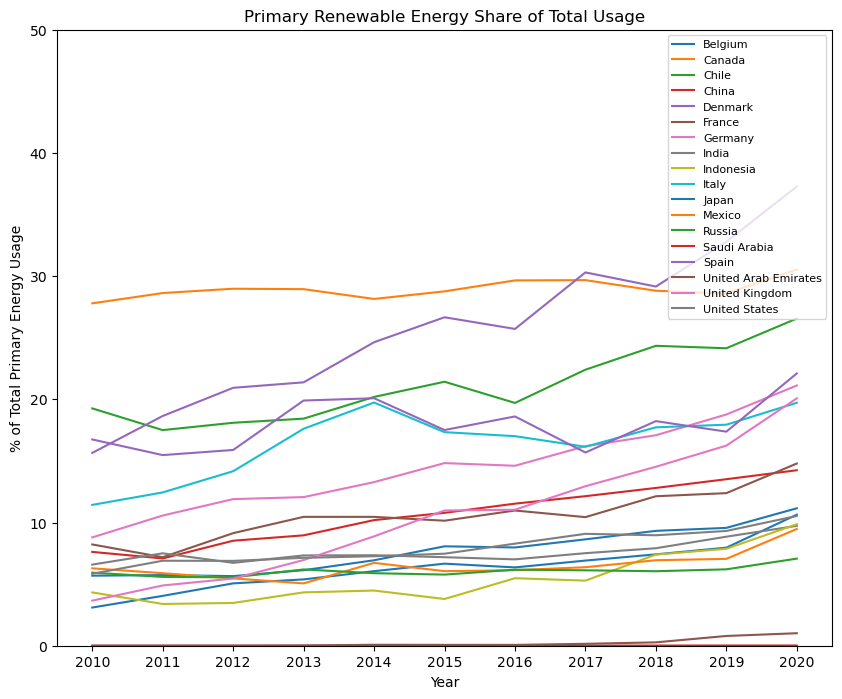

In [21]:
fig, ax = plt.subplots(1, figsize=(10, 8))
plt.plot(primary.T)
plt.legend(primary.T.columns, loc='upper right', fontsize=8)
plt.title('Primary Renewable Energy Share of Total Usage')
plt.xlabel('Year')
plt.ylabel('% of Total Primary Energy Usage')
plt.ylim((0, 50))
plt.show()

In [22]:
primary_avg = primary
primary_avg['primary_avg'] = (primary_avg['2010'] + primary_avg['2011'] + primary_avg['2012'] + primary_avg['2013'] + primary_avg['2014'] + primary_avg['2015'] + primary_avg['2016'] + primary_avg['2017'] + primary_avg['2018'] + primary_avg['2019'] + primary_avg['2020']) / 11
primary_avg = primary_avg.drop(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'], axis=1)
primary_avg

,primary_avg
Entity,
Belgium,6.325569
Canada,28.955999
Chile,21.097551
China,10.673004
Denmark,25.740076
France,10.575268
Germany,14.473133
India,7.607880
Indonesia,5.425008


### Quantifying Non-renewable Energy Stressors (pollution, warming, etc.)

In [23]:
temp_delta = pd.read_csv('./data/Annual_Surface_Temperature_Change.csv').set_index('Country')
temp_delta.head(3)

,ObjectId,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,F1961,...,F2012,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021
Country,,,,,,,,,,,,,,,,,,,,,
"Afghanistan, Islamic Rep. of",1,AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",-0.105,...,0.234,1.308,0.457,1.101,1.607,1.568,1.580,0.960,0.544,1.421
Albania,2,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",0.627,...,1.568,1.444,1.322,1.665,1.601,1.269,2.146,1.823,1.623,1.682
Algeria,3,DZ,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",0.162,...,1.128,1.173,1.676,1.101,1.736,1.498,1.211,1.094,1.913,2.317


In [24]:
temp_delta = temp_delta[['F2010', 'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018', 'F2019', 'F2020']]
temp_delta.head()

,F2010,F2011,F2012,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020
Country,,,,,,,,,,,
"Afghanistan, Islamic Rep. of",1.646,1.446,0.234,1.308,0.457,1.101,1.607,1.568,1.580,0.960,0.544
Albania,1.274,1.108,1.568,1.444,1.322,1.665,1.601,1.269,2.146,1.823,1.623
Algeria,2.249,1.390,1.128,1.173,1.676,1.101,1.736,1.498,1.211,1.094,1.913
American Samoa,1.047,0.642,0.646,0.883,0.554,0.394,0.924,0.820,0.574,0.924,0.815
"Andorra, Principality of",0.411,1.617,1.196,0.757,1.857,1.546,1.830,1.771,1.761,1.813,2.401


In [25]:
rel = ['China', 'United States', 'Germany', 'Japan', 'Russia', 'Saudi Arabia', 'United Arab Emirates', 'United Kingdom', 'India', 'Italy', 'Spain', 'France', 'Netherlands', 'Canada', 'Belgium', 'Mexico', 'Denmark', 'Chile', 'Indonesia']
temp_delta = temp_delta.loc[temp_delta.index.isin(rel)]

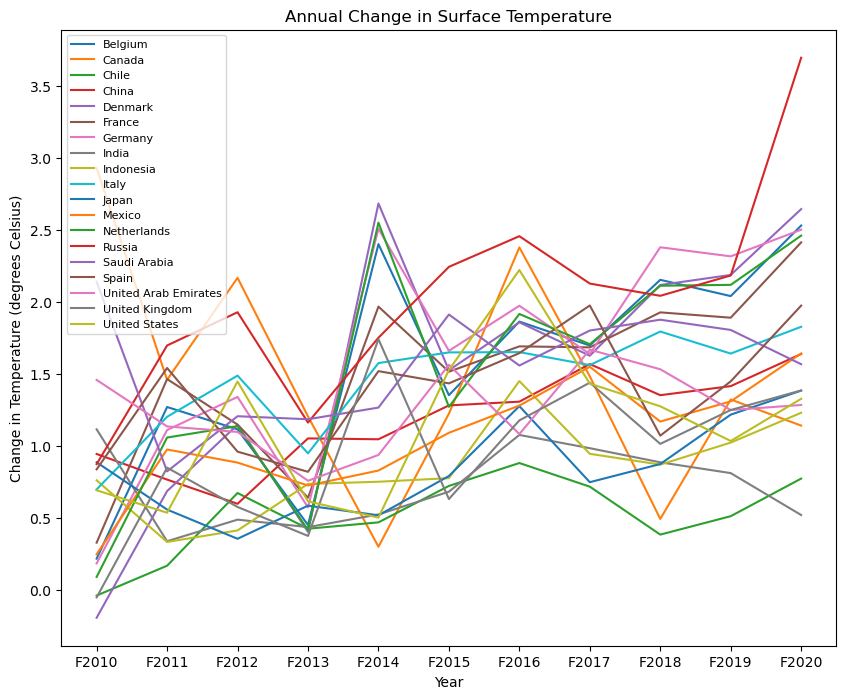

In [26]:
fig, ax = plt.subplots(1, figsize=(10, 8))
plt.plot(temp_delta.T)
plt.legend(temp_delta.T.columns, loc='best', fontsize=8)
plt.title('Annual Change in Surface Temperature')
plt.xlabel('Year')
plt.ylabel('Change in Temperature (degrees Celsius)')
plt.show()

In [27]:
temp_delta_avg = temp_delta
temp_delta_avg['temp_delta_avg'] = (temp_delta_avg['F2010'] + temp_delta_avg['F2011'] + temp_delta_avg['F2012'] + temp_delta_avg['F2013'] + temp_delta_avg['F2014'] + temp_delta_avg['F2015'] + temp_delta_avg['F2016'] + temp_delta_avg['F2017'] + temp_delta_avg['F2018'] + temp_delta_avg['F2019'] + temp_delta_avg['F2020']) / 11
temp_delta_avg = temp_delta_avg.drop(['F2010', 'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018', 'F2019', 'F2020'], axis=1)
temp_delta_avg

,temp_delta_avg
Country,
Belgium,1.551545
Canada,1.461818
Chile,0.514818
China,1.176818
Denmark,1.514636
France,1.513182
Germany,1.650909
India,0.712545
Indonesia,0.842364


### Initial Bubble Plot

In [28]:
invest_vs_impact = pd.merge(temp_delta_avg, renew_invest_avg, left_on=temp_delta_avg.index, right_on=renew_invest_avg.index).rename(columns={'key_0': 'Country'}).set_index('Country')
invest_vs_impact = pd.merge(invest_vs_impact, primary_avg, left_on=invest_vs_impact.index, right_on=primary_avg.index).rename(columns={'key_0': 'Country'}).set_index('Country')
invest_vs_impact['primary_avg_scale'] = invest_vs_impact['primary_avg'] ** 4
invest_vs_impact

,temp_delta_avg,renew_invest_avg,primary_avg,primary_avg_scale
Country,,,,
Belgium,1.551545,2.726771,6.325569,1601.026101
Canada,1.461818,1.363102,28.955999,702998.206894
Chile,0.514818,0.153419,21.097551,198119.950831
China,1.176818,0.656603,10.673004,12976.173520
Denmark,1.514636,0.826918,25.740076,438974.537705
France,1.513182,1.986604,10.575268,12507.354127
Germany,1.650909,1.161476,14.473133,43878.347852
Indonesia,0.842364,0.250591,5.425008,866.166513
Italy,1.455636,1.777062,16.479306,73748.926191


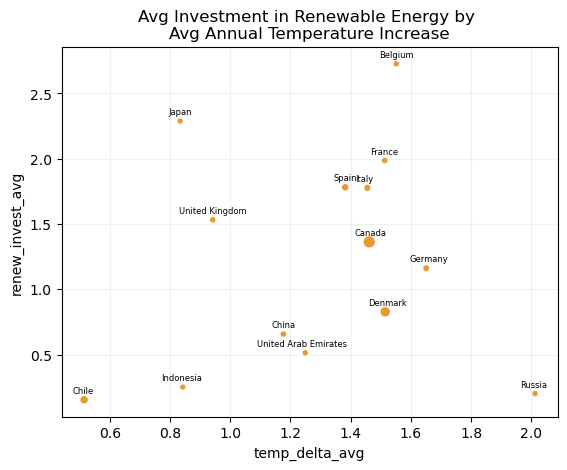

In [29]:
sns.scatterplot(data=invest_vs_impact, x='temp_delta_avg', y='renew_invest_avg', size='primary_avg_scale', legend=False, color='#eb982d')
plt.title('Avg Investment in Renewable Energy by \nAvg Annual Temperature Increase')
plt.grid(alpha=0.18)

for i, txt in enumerate(invest_vs_impact.index):
    plt.annotate(txt, (invest_vs_impact['temp_delta_avg'][i] - (0.008 * len(txt)), invest_vs_impact['renew_invest_avg'][i] + 0.05), fontsize=6)

plt.show()

In [70]:
gdp_per_capita = pd.read_csv('./data/country_gdp_per_capita_worldbank.csv')
gdp_per_capita.head(3)

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25609.955720,26515.678080,26942.307980,28421.386490,28451.273740,29326.708060,30220.594520,31650.760540,24487.863560,29342.100860
1,Africa Eastern and Southern,AFE,162.907576,162.546236,171.996697,199.182564,179.381788,198.223726,209.407648,211.699966,...,1760.216229,1731.795976,1719.809190,1540.850354,1432.111827,1613.788555,1550.180567,1500.229274,1353.769160,1537.336021
2,Afghanistan,AFG,62.369375,62.443703,60.950364,82.021738,85.511073,105.243196,143.103233,167.165675,...,663.141053,651.987862,628.146804,592.476537,520.252064,530.149831,502.056771,500.522664,516.866552,368.754614


In [71]:
gdp_per_capita = gdp_per_capita[['Country Name', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']]
gdp_per_capita.head(3)

,Country Name,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,24452.928360,26044.435930,25609.955720,26515.678080,26942.307980,28421.386490,28451.273740,29326.708060,30220.594520,31650.760540,24487.863560
1,Africa Eastern and Southern,1643.550495,1792.847428,1760.216229,1731.795976,1719.809190,1540.850354,1432.111827,1613.788555,1550.180567,1500.229274,1353.769160
2,Afghanistan,554.595200,621.912311,663.141053,651.987862,628.146804,592.476537,520.252064,530.149831,502.056771,500.522664,516.866552


In [72]:
gdp_per_capita_avg = gdp_per_capita.rename(columns={'Country Name': 'Country'})
gdp_per_capita_avg['gdp_per_capita_avg'] = (gdp_per_capita_avg['2010'] + gdp_per_capita_avg['2011'] + gdp_per_capita_avg['2012'] + gdp_per_capita_avg['2013'] + gdp_per_capita_avg['2014'] + gdp_per_capita_avg['2015'] + gdp_per_capita_avg['2016'] + gdp_per_capita_avg['2017'] + gdp_per_capita_avg['2018'] + gdp_per_capita_avg['2019'] + gdp_per_capita_avg['2020']) / 11
gdp_per_capita_avg = gdp_per_capita_avg.drop(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'], axis=1)
gdp_per_capita_avg = gdp_per_capita_avg.set_index('Country')

gdp_per_capita_avg.head(3)

,gdp_per_capita_avg
Country,
Aruba,27465.808453
Africa Eastern and Southern,1603.559005
Afghanistan,571.100695


In [34]:
temp_delta2 = pd.read_csv('./data/Annual_Surface_Temperature_Change.csv').set_index('Country')
temp_delta2 = temp_delta2[['F2010', 'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018', 'F2019', 'F2020']]

temp_delta_avg2 = temp_delta2
temp_delta_avg2['temp_delta_avg'] = (temp_delta_avg2['F2010'] + temp_delta_avg2['F2011'] + temp_delta_avg2['F2012'] + temp_delta_avg2['F2013'] + temp_delta_avg2['F2014'] + temp_delta_avg2['F2015'] + temp_delta_avg2['F2016'] + temp_delta_avg2['F2017'] + temp_delta_avg2['F2018'] + temp_delta_avg2['F2019'] + temp_delta_avg2['F2020']) / 11
temp_delta_avg2 = temp_delta_avg2.drop(['F2010', 'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018', 'F2019', 'F2020'], axis=1)
temp_delta_avg2.head(5)

,temp_delta_avg
Country,
"Afghanistan, Islamic Rep. of",1.131909
Albania,1.531182
Algeria,1.469909
American Samoa,0.747545
"Andorra, Principality of",1.541818


In [36]:
renew_invest_avg2 = expend
renew_invest_avg2['renew_invest_avg'] = (renew_invest_avg2['F2010'] + renew_invest_avg2['F2011'] + renew_invest_avg2['F2012'] + renew_invest_avg2['F2013'] + renew_invest_avg2['F2014'] + renew_invest_avg2['F2015'] + renew_invest_avg2['F2016'] + renew_invest_avg2['F2017'] + renew_invest_avg2['F2018'] + renew_invest_avg2['F2019'] + renew_invest_avg2['F2020']) / 11
renew_invest_avg2 = renew_invest_avg2.drop(['F2010', 'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018', 'F2019', 'F2020'], axis=1)
renew_invest_avg2.head(5)

,renew_invest_avg
Country,
"Afghanistan, Islamic Rep. of",0.176013
Albania,0.231864
Algeria,0.000000
Angola,0.240865
Argentina,0.058501


In [77]:
invest_vs_impact2 = pd.merge(temp_delta_avg2, renew_invest_avg2, left_on=temp_delta_avg2.index, right_on=renew_invest_avg2.index).rename(columns={'key_0': 'Country'}).set_index('Country')
invest_vs_impact2 = pd.merge(invest_vs_impact2, gdp_per_capita_avg, left_on=invest_vs_impact2.index, right_on=gdp_per_capita_avg.index).rename(columns={'key_0': 'Country'}).set_index('Country')
invest_vs_impact2.head(5)

,temp_delta_avg,renew_invest_avg,gdp_per_capita_avg
Country,,,
Albania,1.531182,0.231864,4581.339418
Algeria,1.469909,0.000000,4586.063210
Angola,1.270727,0.240865,3314.440736
Argentina,0.720273,0.058501,12107.286063
Australia,0.992636,1.670426,57985.388578


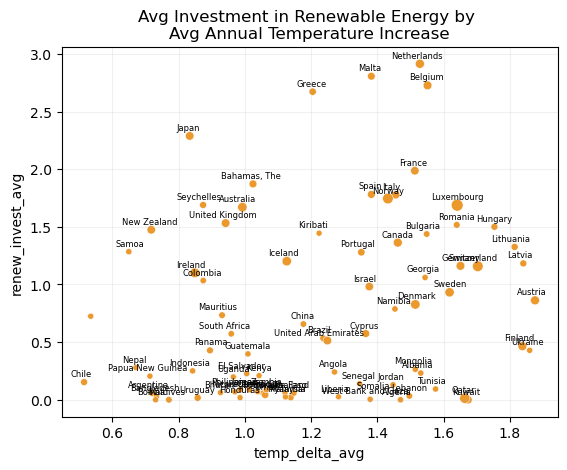

In [83]:
sns.scatterplot(data=invest_vs_impact2, x='temp_delta_avg', y='renew_invest_avg', size='gdp_per_capita_avg', legend=False, color='#eb982d')
plt.title('Avg Investment in Renewable Energy by \nAvg Annual Temperature Increase')
plt.grid(alpha=0.18)

for i, txt in enumerate(invest_vs_impact2.index):
    plt.annotate(txt, (invest_vs_impact2['temp_delta_avg'][i] - (0.008 * len(txt)), invest_vs_impact2['renew_invest_avg'][i] + 0.05), fontsize=6)

plt.show()